In [646]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from IPython.display import display, HTML


In [647]:
# 데이터 로드
df = pd.read_csv("predictions.csv")


In [648]:
df

,user_id,성별,연령대,나이,키,현재 체중,목표 체중,BMI,허리둘레,수축기혈압(최고 혈압),...,활동 수준,흡연상태,음주여부,간 지표,비만 위험 지수,운동 개선 필요성,운동 점수,식단 개선 필요성,식단 점수,예측 날짜
0,user_0,남성,60대 이상,73,166.7,78.1,50.5,28.1,89.6,160,...,중간활동,과거 흡연,가끔,경계,43.0,49,61,55,46,2024-12-09 07:05:46.881297
1,user_1,남성,60대 이상,75,167.8,90.6,75.1,32.2,99.0,166,...,저활동,비흡연,가끔,위험,47.2,46,27,43,68,2024-11-25 07:05:46.881297
2,user_2,여성,20대,29,163.6,55.4,77.8,20.7,91.5,133,...,저활동,현재 흡연,자주,정상,42.4,75,34,52,47,2024-10-31 07:05:46.881297
3,user_3,여성,50대,53,159.8,84.9,67.1,33.2,92.3,153,...,중간활동,과거 흡연,비음주,위험,46.3,56,51,55,43,2024-11-22 07:05:46.881297
4,user_4,남성,50대,56,158.6,82.5,68.5,32.8,79.3,151,...,저활동,비흡연,가끔,위험,44.2,55,35,56,49,2024-08-04 07:05:46.881297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,user_296,여성,30대,38,180.9,53.7,57.8,16.4,81.7,130,...,고활동,비흡연,자주,정상,35.7,72,95,40,45,2024-11-08 07:05:46.881297
297,user_297,여성,60대 이상,73,173.8,75.0,55.0,24.8,74.3,161,...,저활동,현재 흡연,비음주,경계,37.9,51,29,49,60,2024-04-12 07:05:46.881297
298,user_298,여성,50대,55,165.1,96.5,55.8,35.4,82.3,160,...,고활동,비흡연,가끔,위험,44.7,54,96,45,63,2025-02-18 07:05:46.881297
299,user_299,남성,40대,45,161.7,70.5,62.5,27.0,76.1,146,...,저활동,비흡연,가끔,경계,41.2,64,44,65,16,2024-12-20 07:05:46.881297


In [649]:
df.head()

,user_id,성별,연령대,나이,키,현재 체중,목표 체중,BMI,허리둘레,수축기혈압(최고 혈압),...,활동 수준,흡연상태,음주여부,간 지표,비만 위험 지수,운동 개선 필요성,운동 점수,식단 개선 필요성,식단 점수,예측 날짜
0,user_0,남성,60대 이상,73,166.7,78.1,50.5,28.1,89.6,160,...,중간활동,과거 흡연,가끔,경계,43.0,49,61,55,46,2024-12-09 07:05:46.881297
1,user_1,남성,60대 이상,75,167.8,90.6,75.1,32.2,99.0,166,...,저활동,비흡연,가끔,위험,47.2,46,27,43,68,2024-11-25 07:05:46.881297
2,user_2,여성,20대,29,163.6,55.4,77.8,20.7,91.5,133,...,저활동,현재 흡연,자주,정상,42.4,75,34,52,47,2024-10-31 07:05:46.881297
3,user_3,여성,50대,53,159.8,84.9,67.1,33.2,92.3,153,...,중간활동,과거 흡연,비음주,위험,46.3,56,51,55,43,2024-11-22 07:05:46.881297
4,user_4,남성,50대,56,158.6,82.5,68.5,32.8,79.3,151,...,저활동,비흡연,가끔,위험,44.2,55,35,56,49,2024-08-04 07:05:46.881297


In [650]:
def merge_columns(df, columns, target_column):
    """지정된 컬럼들의 데이터를 병합하여 target_column으로 만듭니다."""
    df[target_column] = df[columns].apply(
        lambda row: next((val for val in row if pd.notna(val)), np.nan), axis=1
    )
    return df


In [651]:
# 동일한 의미의 중복 컬럼 리스트
duplicate_columns = {
    "user_id": ["user_id"],
    "성별": ["성별", "gender"],
    "나이": ["나이", "age"],
    "연령대": ["연령대", "age"],
    "BMI": ["BMI"],
    "현재 체중": ["현재 체중", "weight"],
    "목표 체중": ["목표 체중", "goal_weight"],
    "운동 개선 필요성": ["운동 가능성",'비만 위험 지수운동 가능성',"운동 개선 필요성"],
    "운동 점수": ["운동 점수", "운동 확률"],
    "식단 개선 필요성": ["식단 개선 필요성"],
    "식단 점수": ["식단 확률", "식단 점수"],
    "예측 날짜": ["예측 날짜"],
    "허리둘레": ["허리둘레 (cm)", "허리둘레 (cm).1", "waist", "허리둘레"],
    "키": ["키 (cm)", "height"],
    "수축기혈압(최고 혈압)": ["수축기혈압(최고 혈압)", "systolic_bp"],
    "이완기혈압(최저 혈압)": ["이완기혈압(최저 혈압)", "diastolic_bp"],
    "총콜레스테롤": ["콜레스테롤 지수", "cholesterol", "총콜레스테롤"],
    "활동 수준": ["활동 수준", "activity_level", "activity_level_code"],
    "HDL콜레스테롤": ["HDL콜레스테롤"],
    "LDL콜레스테롤": ["LDL콜레스테롤"],
    "트리글리세라이드": ["트리글리세라이드"],
    "흡연상태": ["흡연상태"],
    "음주여부": ["음주여부"],
    "혈압 차이": ["혈압 차이"],
    "고혈당 위험": ["고혈당 위험"],
    "간 지표": ["간 지표"],
    "비만 위험 지수": ["비만 위험 지수"],
    "식전혈당(공복혈당)": ["식전혈당(공복혈당)"]
}


In [652]:
# 각 그룹의 컬럼들을 병합하고 대표 컬럼으로 이름을 변경합니다
for rep_col, dup_cols in duplicate_columns.items():
    if len(dup_cols) > 1:
        existing_cols = [col for col in dup_cols if col in df.columns]
        if existing_cols:
            df = merge_columns(df, existing_cols, rep_col)
            # 원래 컬럼들 삭제 (대표 컬럼 제외)
            df.drop(columns=[col for col in existing_cols if col != rep_col], inplace=True)
    elif dup_cols[0] in df.columns and dup_cols[0] != rep_col:
        # 컬럼 이름만 변경
        df.rename(columns={dup_cols[0]: rep_col}, inplace=True)

In [675]:
# 결과 확인
print(df.columns)

Index(['user_id', '성별', '연령대', '나이', '키', '현재 체중', '목표 체중', 'BMI', '허리둘레',
       '수축기혈압(최고 혈압)', '고혈당 위험', '이완기혈압(최저 혈압)', '식전혈당(공복혈당)', '고혈압 위험',
       '혈압 차이', '고혈당 위험', '총콜레스테롤', 'HDL콜레스테롤', 'LDL콜레스테롤', '트리글리세라이드',
       '활동 수준', '흡연상태', '음주여부', '간 지표', '비만 위험 지수', '운동 개선 필요성', '운동 점수',
       '식단 개선 필요성', '식단 점수', '예측 날짜'],
      dtype='object')


In [676]:
df.columns.nunique()

29

In [677]:
new_columns = ['user_id', '성별', '연령대', '나이', '키', '현재 체중', '목표 체중', 'BMI', '허리둘레',
               "수축기혈압(최고 혈압)", '고혈당 위험',"이완기혈압(최저 혈압)", '식전혈당(공복혈당)', '고혈압 위험','혈압 차이','고혈당 위험', '총콜레스테롤', 'HDL콜레스테롤', 'LDL콜레스테롤', 
               '트리글리세라이드', '활동 수준', '흡연상태', '음주여부', '간 지표', '비만 위험 지수',
               '운동 개선 필요성', '운동 점수', '식단 개선 필요성', '식단 점수', '예측 날짜']

In [678]:
df = df.reindex(columns=new_columns)

In [679]:
df.head()

,user_id,성별,연령대,나이,키,현재 체중,목표 체중,BMI,허리둘레,수축기혈압(최고 혈압),...,활동 수준,흡연상태,음주여부,간 지표,비만 위험 지수,운동 개선 필요성,운동 점수,식단 개선 필요성,식단 점수,예측 날짜
0,user_0,여성,60대 이상,74,190.0,58.2,74.3,16.1,85.3,132,...,중간활동,과거 흡연,가끔,정상,38.2,54,55,47,41,2024-04-02 07:08:18.382700
1,user_1,여성,20대,23,172.4,75.2,55.4,25.3,85.3,122,...,저활동,비흡연,비음주,경계,40.9,75,23,42,59,2024-06-11 07:08:18.382700
2,user_2,여성,40대,42,170.7,93.7,44.5,32.2,90.6,126,...,저활동,과거 흡연,비음주,위험,45.5,62,22,52,37,2024-04-20 07:08:18.382700
3,user_3,남성,50대,51,169.6,38.4,67.5,13.3,54.2,123,...,저활동,비흡연,비음주,정상,25.9,67,32,55,31,2024-07-17 07:08:18.382700
4,user_4,남성,60대 이상,76,186.6,63.1,75.0,18.1,71.9,135,...,저활동,현재 흡연,비음주,정상,38.1,52,43,55,63,2024-10-10 07:08:18.382700


In [680]:
df.columns

Index(['user_id', '성별', '연령대', '나이', '키', '현재 체중', '목표 체중', 'BMI', '허리둘레',
       '수축기혈압(최고 혈압)', '고혈당 위험', '이완기혈압(최저 혈압)', '식전혈당(공복혈당)', '고혈압 위험',
       '혈압 차이', '고혈당 위험', '총콜레스테롤', 'HDL콜레스테롤', 'LDL콜레스테롤', '트리글리세라이드',
       '활동 수준', '흡연상태', '음주여부', '간 지표', '비만 위험 지수', '운동 개선 필요성', '운동 점수',
       '식단 개선 필요성', '식단 점수', '예측 날짜'],
      dtype='object')

In [681]:
df.to_csv("predictions.csv", index=False)

In [660]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [661]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

def generate_realistic_data(num_rows=301):
    date_start = datetime.now() - timedelta(days=365)
    date_end = datetime.now() + timedelta(days=120)

    # 연령대별 비율 조정 (고령화 사회 반영)
    age_groups = ['10대', '20대', '30대', '40대', '50대', '60대 이상']
    age_weights = [0.1, 0.15, 0.2, 0.2, 0.2, 0.15]

    data = {
        'user_id': [f'user_{i}' for i in range(num_rows)],
        '성별': np.random.choice(['남성', '여성'], num_rows),
        '연령대': np.random.choice(age_groups, num_rows, p=age_weights),
        '나이': np.random.randint(10, 80, num_rows),
        '키': np.random.normal(170, 10, num_rows).round(1),
        '현재 체중': np.random.normal(70, 15, num_rows).round(1),
        '목표 체중': np.random.normal(65, 10, num_rows).round(1),
        '허리둘레': np.random.normal(85, 10, num_rows).round(1),
        '총콜레스테롤': np.random.normal(200, 40, num_rows).astype(int),
        'HDL콜레스테롤': np.random.normal(50, 15, num_rows).astype(int),
        'LDL콜레스테롤': np.random.normal(130, 35, num_rows).astype(int),
        '트리글리세라이드': np.random.normal(150, 70, num_rows).astype(int),
        '식전혈당(공복혈당)': np.random.normal(100, 25, num_rows).astype(int),
        '활동 수준': np.random.choice(["저활동", "중간활동", "고활동"], num_rows, p=[0.4, 0.4, 0.2]),
        '흡연상태': np.random.choice(['비흡연', '과거 흡연', '현재 흡연'], num_rows, p=[0.6, 0.2, 0.2]),
        '음주여부': np.random.choice(['비음주', '가끔', '자주'], num_rows, p=[0.3, 0.4, 0.3]),
        '예측 날짜': [date_start + timedelta(days=np.random.randint(0, 400)) for _ in range(num_rows)]
    }

    df = pd.DataFrame(data)

    # BMI 계산
    df['BMI'] = (df['현재 체중'] / ((df['키'] / 100) ** 2)).round(1)

    # 수축기 혈압 계산 (나이와 BMI 고려)
    df['수축기혈압(최고 혈압)'] = (90 + df['나이'] * 0.5 + df['BMI'] * 0.5 + np.random.normal(0, 5, num_rows)).astype(int)
    
    # 이완기 혈압 계산 (수축기 혈압과의 관계 고려)
    df['이완기혈압(최저 혈압)'] = (df['수축기혈압(최고 혈압)'] * 2/3 + np.random.normal(0, 3, num_rows)).clip(60, 90).astype(int)

    # 혈압 차이 계산
    df['혈압 차이'] = df['수축기혈압(최고 혈압)'] - df['이완기혈압(최저 혈압)']

    # 고혈압 위험 계산
    df['고혈압 위험'] = pd.cut(df['수축기혈압(최고 혈압)'], 
                            bins=[0, 120, 140, np.inf], 
                            labels=['정상', '주의', '고위험'])

    # 고혈당 위험 계산 (혈압 위험을 고려)
    df['고혈당 위험'] = pd.cut(df['식전혈당(공복혈당)'], 
                            bins=[0, 100, 125, np.inf], 
                            labels=['낮음', '보통', '높음'])
    
    # 고혈압 위험이 높을수록 고혈당 위험을 한 단계 높임
    df.loc[(df['고혈압 위험'] == '주의') & (df['고혈당 위험'] == '낮음'), '고혈당 위험'] = '보통'
    df.loc[(df['고혈압 위험'] == '고위험') & (df['고혈당 위험'] != '높음'), '고혈당 위험'] = '높음'

    # 간 지표 계산 (가상의 기준)
    df['간 지표'] = pd.cut(df['BMI'] + df['트리글리세라이드']/100, 
                        bins=[0, 25, 30, np.inf], 
                        labels=['정상', '경계', '위험'])

    # 비만 위험 지수 계산
    df['비만 위험 지수'] = (df['BMI'] * 0.5 + df['허리둘레'] * 0.3 + df['트리글리세라이드'] * 0.2 / 10).round(1)

    # 운동 개선 필요성 및 점수 계산
    df['운동 개선 필요성'] = (100 - df['나이'] * 0.5 - df['BMI'] * 0.5).clip(0, 100).astype(int)
    df['운동 점수'] = (df['활동 수준'].map({'저활동': 30, '중간활동': 60, '고활동': 90}) + 
                    np.random.normal(0, 10, num_rows)).clip(0, 100).round().astype(int)

    # 식단 개선 필요성 및 점수 계산
    df['식단 개선 필요성'] = (df['BMI'] * 0.3 + df['총콜레스테롤'] * 0.2 / 2 + 
                         df['트리글리세라이드'] * 0.2 / 5 + 
                         df['식전혈당(공복혈당)'] * 0.3 / 2).clip(0, 100).round().astype(int)
    df['식단 점수'] = (100 - df['식단 개선 필요성'] + np.random.normal(0, 10, num_rows)).clip(0, 100).round().astype(int)

    return df

# 데이터 생성
df = generate_realistic_data(301)

# 결과 확인
print(df.describe())


               나이           키       현재 체중       목표 체중        허리둘레      총콜레스테롤  \
count  301.000000  301.000000  301.000000  301.000000  301.000000  301.000000   
mean    47.036545  169.806645   69.849169   66.177076   84.277409  202.312292   
min     10.000000  145.200000   25.400000   35.500000   49.000000   91.000000   
25%     29.000000  163.000000   59.600000   59.400000   77.100000  174.000000   
50%     46.000000  170.400000   69.300000   66.100000   84.600000  203.000000   
75%     67.000000  176.100000   79.900000   73.000000   91.500000  228.000000   
max     79.000000  196.100000  106.900000   95.000000  114.600000  307.000000   
std     21.247949   10.390824   14.904484   10.380333   10.580181   40.300233   

         HDL콜레스테롤    LDL콜레스테롤    트리글리세라이드  식전혈당(공복혈당)  \
count  301.000000  301.000000  301.000000  301.000000   
mean    49.495017  128.448505  157.139535   97.059801   
min      6.000000   40.000000  -53.000000   19.000000   
25%     38.000000  104.000000  107.000000 

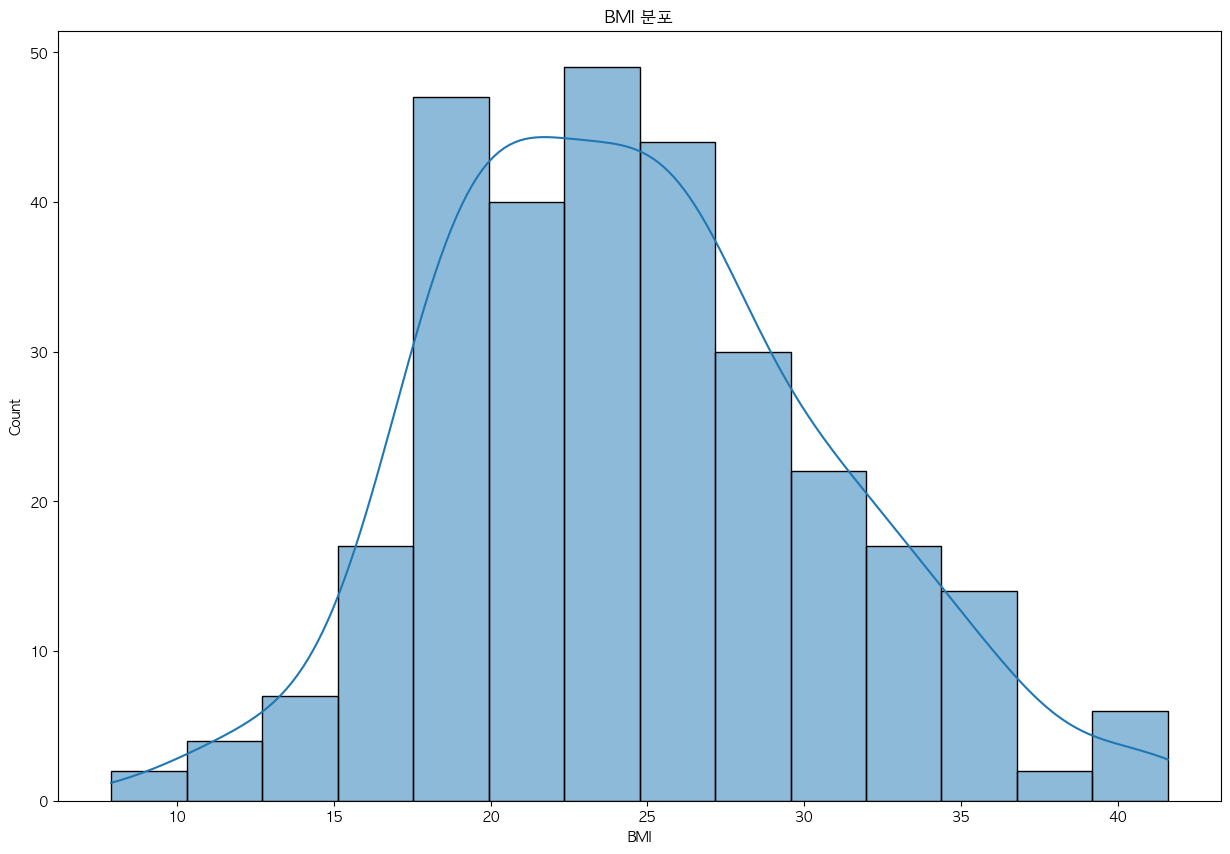

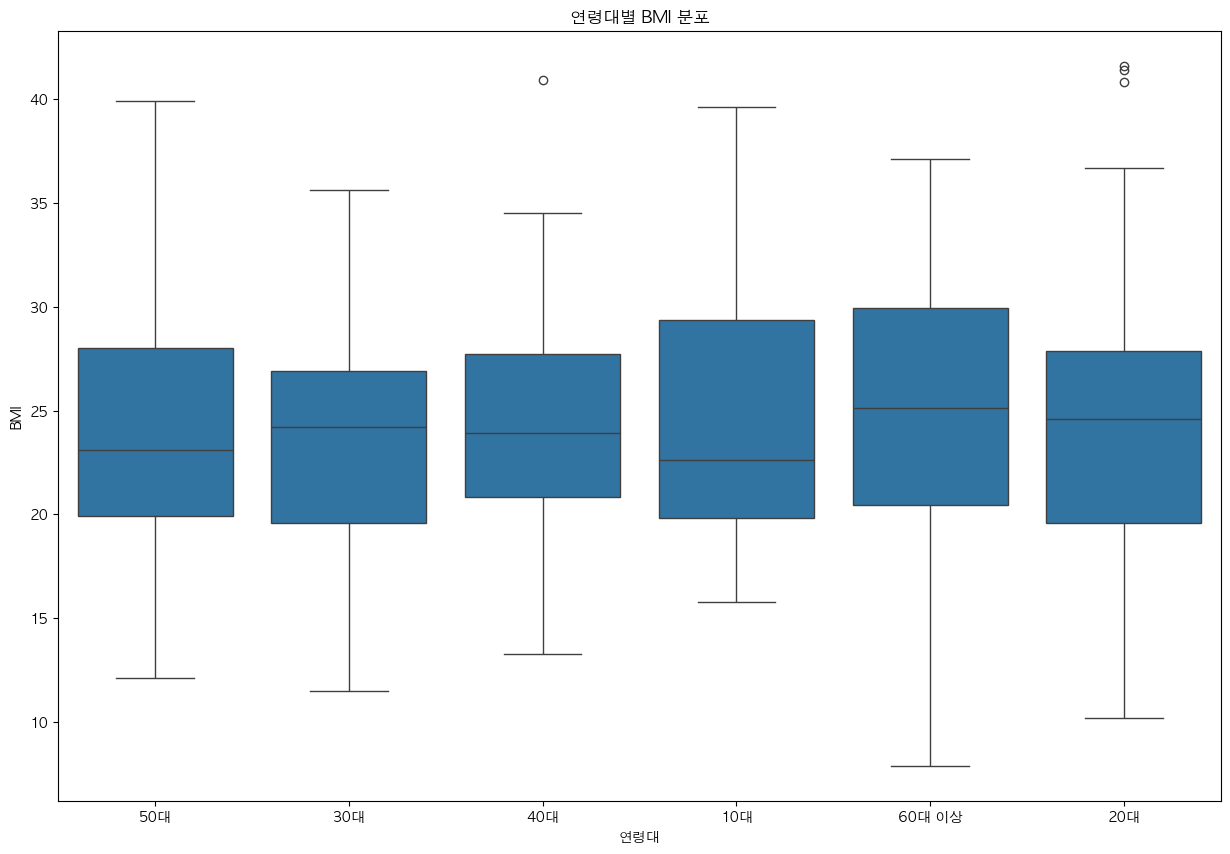

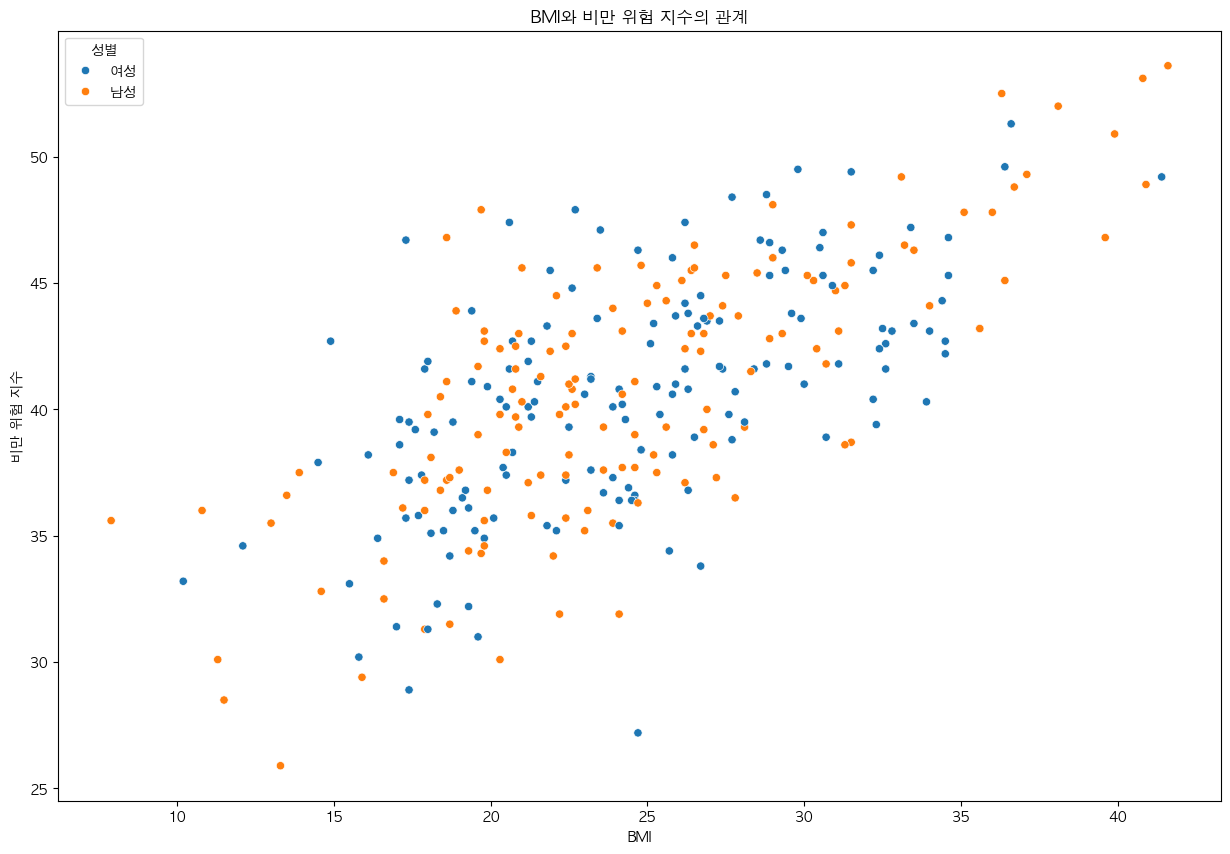

In [662]:
# 데이터 분포 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.histplot(data=df, x='BMI', kde=True)
plt.title('BMI 분포')
plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x='연령대', y='BMI')
plt.title('연령대별 BMI 분포')
plt.show()

plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x='BMI', y='비만 위험 지수', hue='성별')
plt.title('BMI와 비만 위험 지수의 관계')
plt.show()


In [663]:
df.to_csv("predictions.csv", index=False)

In [664]:
def calculate_age_group(age):
    """
    나이를 10단위 연령대로 변환하는 함수
    """
    if age < 10:
        return "0-9세"
    elif age < 20:
        return "10대"
    elif age < 30:
        return "20대"
    elif age < 40:
        return "30대"
    elif age < 50:
        return "40대"
    elif age < 60:
        return "50대"
    else:
        return "60대 이상"



In [665]:
# 데이터프레임에 연령대 열 추가
df['연령대'] = df['나이'].apply(calculate_age_group)

In [666]:
# 결과 확인
print(df[['나이', '연령대']].head(20))

    나이     연령대
0   74  60대 이상
1   23     20대
2   42     40대
3   51     50대
4   76  60대 이상
5   12     10대
6   49     40대
7   40     40대
8   42     40대
9   56     50대
10  69  60대 이상
11  29     20대
12  57     50대
13  69  60대 이상
14  78  60대 이상
15  35     30대
16  38     30대
17  19     10대
18  77  60대 이상
19  55     50대


In [667]:
df.columns

Index(['user_id', '성별', '연령대', '나이', '키', '현재 체중', '목표 체중', '허리둘레', '총콜레스테롤',
       'HDL콜레스테롤', 'LDL콜레스테롤', '트리글리세라이드', '식전혈당(공복혈당)', '활동 수준', '흡연상태',
       '음주여부', '예측 날짜', 'BMI', '수축기혈압(최고 혈압)', '이완기혈압(최저 혈압)', '혈압 차이',
       '고혈압 위험', '고혈당 위험', '간 지표', '비만 위험 지수', '운동 개선 필요성', '운동 점수',
       '식단 개선 필요성', '식단 점수'],
      dtype='object')

In [668]:
df.to_csv("predictions.csv", index=False)

In [669]:
df.columns

Index(['user_id', '성별', '연령대', '나이', '키', '현재 체중', '목표 체중', '허리둘레', '총콜레스테롤',
       'HDL콜레스테롤', 'LDL콜레스테롤', '트리글리세라이드', '식전혈당(공복혈당)', '활동 수준', '흡연상태',
       '음주여부', '예측 날짜', 'BMI', '수축기혈압(최고 혈압)', '이완기혈압(최저 혈압)', '혈압 차이',
       '고혈압 위험', '고혈당 위험', '간 지표', '비만 위험 지수', '운동 개선 필요성', '운동 점수',
       '식단 개선 필요성', '식단 점수'],
      dtype='object')

In [636]:
df['예측 날짜']

0     2024-12-09 07:05:46.881297
1     2024-11-25 07:05:46.881297
2     2024-10-31 07:05:46.881297
3     2024-11-22 07:05:46.881297
4     2024-08-04 07:05:46.881297
                 ...            
296   2024-11-08 07:05:46.881297
297   2024-04-12 07:05:46.881297
298   2025-02-18 07:05:46.881297
299   2024-12-20 07:05:46.881297
300   2024-11-04 07:05:46.881297
Name: 예측 날짜, Length: 301, dtype: datetime64[ns]

In [637]:
df['예측 날짜'] = pd.to_datetime(df['예측 날짜'])

In [638]:
df

,user_id,성별,연령대,나이,키,현재 체중,목표 체중,허리둘레,총콜레스테롤,HDL콜레스테롤,...,이완기혈압(최저 혈압),혈압 차이,고혈압 위험,고혈당 위험,간 지표,비만 위험 지수,운동 개선 필요성,운동 점수,식단 개선 필요성,식단 점수
0,user_0,남성,60대 이상,73,166.7,78.1,50.5,89.6,277,57,...,90,70,고위험,높음,경계,43.0,49,61,55,46
1,user_1,남성,60대 이상,75,167.8,90.6,75.1,99.0,160,58,...,90,76,고위험,높음,위험,47.2,46,27,43,68
2,user_2,여성,20대,29,163.6,55.4,77.8,91.5,237,12,...,90,43,주의,보통,정상,42.4,75,34,52,47
3,user_3,여성,50대,53,159.8,84.9,67.1,92.3,243,37,...,90,63,고위험,높음,위험,46.3,56,51,55,43
4,user_4,남성,50대,56,158.6,82.5,68.5,79.3,230,58,...,90,61,고위험,높음,위험,44.2,55,35,56,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,user_296,여성,30대,38,180.9,53.7,57.8,81.7,142,54,...,87,43,주의,보통,정상,35.7,72,95,40,45
297,user_297,여성,60대 이상,73,173.8,75.0,55.0,74.3,163,54,...,90,71,고위험,높음,경계,37.9,51,29,49,60
298,user_298,여성,50대,55,165.1,96.5,55.8,82.3,133,62,...,90,70,고위험,높음,위험,44.7,54,96,45,63
299,user_299,남성,40대,45,161.7,70.5,62.5,76.1,230,77,...,90,56,고위험,높음,경계,41.2,64,44,65,16


In [639]:
df.columns

Index(['user_id', '성별', '연령대', '나이', '키', '현재 체중', '목표 체중', '허리둘레', '총콜레스테롤',
       'HDL콜레스테롤', 'LDL콜레스테롤', '트리글리세라이드', '식전혈당(공복혈당)', '활동 수준', '흡연상태',
       '음주여부', '예측 날짜', 'BMI', '수축기혈압(최고 혈압)', '이완기혈압(최저 혈압)', '혈압 차이',
       '고혈압 위험', '고혈당 위험', '간 지표', '비만 위험 지수', '운동 개선 필요성', '운동 점수',
       '식단 개선 필요성', '식단 점수'],
      dtype='object')

In [640]:
df["활동 수준"]

0      중간활동
1       저활동
2       저활동
3      중간활동
4       저활동
       ... 
296     고활동
297     저활동
298     고활동
299     저활동
300    중간활동
Name: 활동 수준, Length: 301, dtype: object

In [67]:

# 결측치 현황 확인
print("결측치 현황:")
print(df.isnull().sum())
print("\n결측치 비율:")
print(df.isnull().sum() / len(df) * 100)

결측치 현황:
user_id        90
성별             12
연령대            24
나이            329
키             392
현재 체중          81
목표 체중          82
BMI            79
허리둘레          177
수축기혈압         168
이완기혈압         168
혈압 차이         242
콜레스테롤         168
HDL콜레스테롤      204
LDL콜레스테롤      204
트리글리세라이드      204
식전혈당(공복혈당)    296
활동 수준         210
흡연상태          204
음주여부          204
운동 가능성        252
운동 점수           1
식단 개선 필요성     252
식단 점수           1
예측 날짜          88
dtype: int64

결측치 비율:
user_id       21.634615
성별             2.884615
연령대            5.769231
나이            79.086538
키             94.230769
현재 체중         19.471154
목표 체중         19.711538
BMI           18.990385
허리둘레          42.548077
수축기혈압         40.384615
이완기혈압         40.384615
혈압 차이         58.173077
콜레스테롤         40.384615
HDL콜레스테롤      49.038462
LDL콜레스테롤      49.038462
트리글리세라이드      49.038462
식전혈당(공복혈당)    71.153846
활동 수준         50.480769
흡연상태          49.038462
음주여부          49.038462
운동 가능성        60.576923
운동 점수          0

In [69]:

def handle_missing_values(df):
    # 1. 사용자 ID 처리
    if df['user_id'].isnull().sum() > 0:
        print("경고: user_id에 결측치가 있습니다. 이를 고유한 값으로 대체합니다.")
        df['user_id'] = df['user_id'].fillna(pd.Series([f'generated_id_{i}' for i in range(df['user_id'].isnull().sum())]))

    # 2. 범주형 변수: 최빈값으로 대체
    for col in ['성별', '연령대', '활동 수준', '흡연상태', '음주여부']:
        df[col] = df[col].fillna(df[col].mode()[0])

    # 3. 수치형 변수: 중앙값으로 대체
    numeric_cols = ['나이', '키', '현재 체중', '목표 체중', 'BMI', '허리둘레', 
                    '수축기혈압', '이완기혈압', '혈압 차이', '콜레스테롤', 
                    'HDL콜레스테롤', 'LDL콜레스테롤', '트리글리세라이드', '식전혈당(공복혈당)']
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].fillna(df[col].median())

    # 4. 계산 가능한 변수
    df['BMI'] = df['BMI'].fillna(df['현재 체중'] / ((df['키']/100) ** 2))
    df['혈압 차이'] = df['혈압 차이'].fillna(df['수축기혈압'] - df['이완기혈압'])

    # 5. 예측 관련 변수: 40~100 사이의 랜덤값으로 대체
    prediction_cols = ['운동 가능성', '운동 점수', '식단 개선 필요성', '식단 점수']
    for col in prediction_cols:
        null_mask = df[col].isnull()
        df.loc[null_mask, col] = np.random.randint(40, 101, size=null_mask.sum())

    # 6. 날짜 변수
    df['예측 날짜'] = df['예측 날짜'].fillna(df['예측 날짜'].mode()[0])

    return df

# 결측치 처리 적용
df = handle_missing_values(df)

# 처리 후 결측치 현황 재확인
print("\n결측치 처리 후 현황:")
print(df.isnull().sum())



경고: user_id에 결측치가 있습니다. 이를 고유한 값으로 대체합니다.

결측치 처리 후 현황:
user_id       4
성별            0
연령대           0
나이            0
키             0
현재 체중         0
목표 체중         0
BMI           0
허리둘레          0
수축기혈압         0
이완기혈압         0
혈압 차이         0
콜레스테롤         0
HDL콜레스테롤      0
LDL콜레스테롤      0
트리글리세라이드      0
식전혈당(공복혈당)    0
활동 수준         0
흡연상태          0
음주여부          0
운동 가능성        0
운동 점수         0
식단 개선 필요성     0
식단 점수         0
예측 날짜         0
dtype: int64


In [70]:
df.head()

,user_id,성별,연령대,나이,키,현재 체중,목표 체중,BMI,허리둘레,수축기혈압,...,트리글리세라이드,식전혈당(공복혈당),활동 수준,흡연상태,음주여부,운동 가능성,운동 점수,식단 개선 필요성,식단 점수,예측 날짜
0,게스트,남성,5.0,25.0,170.0,70.0,65.0,24.22,80.0,120.0,...,150.0,90.0,중간활동,비흡연,비음주,🔍 예측을 실행하세요,"('🚨 모델이 로드되지 않았습니다!', 0)",🔍 예측을 실행하세요,"('🚨 모델이 로드되지 않았습니다!', 0)",2025-02-20 02:42:09
1,generated_id_1,남성,5.0,25.0,170.0,70.0,65.0,24.22,80.0,120.0,...,150.0,90.0,저활동,비흡연,비음주,🔍 예측을 실행하세요,0.00%,🔍 예측을 실행하세요,0.00%,2025-02-17 18:59:36
2,generated_id_2,남성,5.0,25.0,170.0,70.0,65.0,24.22,80.0,120.0,...,150.0,90.0,저활동,비흡연,비음주,🔍 예측을 실행하세요,0.00%,🔍 예측을 실행하세요,0.00%,2025-02-17 18:59:36
3,generated_id_3,남성,5.0,25.0,170.0,70.0,65.0,24.22,80.0,120.0,...,150.0,90.0,저활동,비흡연,비음주,🔍 예측을 실행하세요,0.00%,🔍 예측을 실행하세요,0.00%,2025-02-17 18:59:36
4,generated_id_4,남성,5.0,25.0,170.0,70.0,65.0,24.22,80.0,120.0,...,150.0,90.0,저활동,비흡연,비음주,🔍 예측을 실행하세요,0.00%,🔍 예측을 실행하세요,0.00%,2025-02-17 18:59:36


In [71]:
df.to_csv("predictions.csv", index=False)

In [ ]:

# ✅ 동일한 의미의 중복 컬럼 리스트
duplicate_columns = {
"현재 체중": ["현재 체중", "현재 체중 (kg)", "weight"],
"목표 체중": ["목표 체중", "목표 체중 (kg)", "목표체중 (kg)", "goal_weight"],
"연령대": ["연령대", "연령대코드(5세단위)", "age_group"],
"키": ['키 (cm)', "height","키"],
"나이": ["나이", "age"],
"허리둘레": ["허리둘레 (cm)", "waist","허리둘레"],
"수축기혈압(최고 혈압)": ["수축기혈압(최고 혈압)", "systolic_bp"],
"이완기혈압(최저 혈압)": ["이완기혈압(최저 혈압)", "diastolic_bp"],
"콜레스테롤": ["콜레스테롤 지수", "cholesterol","콜레스테롤"],
"활동 수준": [ '활동 수준',"activity_level"],
}

In [ ]:
# ✅ 중복된 컬럼 삭제
df.drop(columns=[
    "prediction_exercise", "prediction_food", "timestamp", "gender"
], inplace=True)

In [49]:
import os

df.to_csv("predictions.csv", index=False)

In [5]:
df.columns

Index(['user_id', '성별', '연령대', 'BMI', '현재 체중', '목표 체중', '운동 가능성', '운동 점수',
       '식단 개선 필요성', '식단 확률', '나이', '예측 날짜', '허리둘레 (cm)', '키 (cm)',
       '수축기혈압(최고 혈압)', '이완기혈압(최저 혈압)', '콜레스테롤 지수', '활동 수준', 'gender', 'age',
       'height', 'weight', 'goal_weight', 'waist', 'systolic_bp',
       'diastolic_bp', 'cholesterol', 'activity_level', 'activity_level_code',
       '허리둘레 (cm).1', 'HDL콜레스테롤', 'LDL콜레스테롤', '트리글리세라이드', '흡연상태', '음주여부',
       '혈압 차이', '총콜레스테롤', '고혈당 위험', '간 지표', '비만 위험 지수', '식전혈당(공복혈당)', '허리둘레',
       '운동 확률', '식단 점수'],
      dtype='object')

In [59]:
# ✅ 동일한 의미의 중복 컬럼 리스트
duplicate_columns = {
    "현재 체중": ["현재 체중", "현재 체중 (kg)", "weight"],
    "목표 체중": ["목표 체중", "목표 체중 (kg)", "목표체중 (kg)", "goal_weight"],
    "연령대": ["연령대", "연령대코드(5세단위)", "age_group"],
    "키": ['키 (cm)', "height","키"],
    "나이": ["나이", "age"],
    "허리둘레": ["허리둘레 (cm)", "waist","허리둘레"],
    "수축기혈압(최고 혈압)": ["수축기혈압(최고 혈압)", "systolic_bp"],
    "이완기혈압(최저 혈압)": ["이완기혈압(최저 혈압)", "diastolic_bp"],
    "콜레스테롤": ["콜레스테롤 지수", "cholesterol","콜레스테롤"],
    "활동 수준": [ '활동 수준',"activity_level"],
}

In [62]:
df.columns

Index(['user_id', '이름', '성별', '연령대', 'BMI', '현재 체중', '목표 체중', '운동 가능성',
       '운동 확률', '식단 개선 필요성', '식단 확률', '나이', '예측 날짜', '허리둘레 (cm)', 'ID',
       '키 (cm)', '수축기혈압(최고 혈압)', '이완기혈압(최저 혈압)', '콜레스테롤 지수', '활동 수준', '활동수준코드',
       '키', '허리둘레', '콜레스테롤', '활동 수준 코드'],
      dtype='object')

In [98]:
# ✅ 컬럼 병합: 첫 번째 값을 유지하거나 평균값 사용
for new_col, old_cols in duplicate_columns.items():
    existing_cols = [col for col in old_cols if col in df.columns]  # 실제 존재하는 컬럼만 선택
    if len(existing_cols) > 1:
        df[new_col] = df[existing_cols].bfill(axis=1).iloc[:, 0]  # 첫 번째 존재하는 값 선택
        df.drop(columns=existing_cols[1:], inplace=True)  # 첫 번째 컬럼 제외하고 나머지는 삭제

In [81]:
df.columns

Index(['user_id', '이름', '성별', '연령대', 'BMI', '현재 체중', '목표 체중', '운동 가능성',
       '운동 확률', '식단 개선 필요성', '식단 확률', '나이', '예측 날짜', '허리둘레 (cm)', '키 (cm)',
       '수축기혈압(최고 혈압)', '이완기혈압(최저 혈압)', '콜레스테롤 지수', '활동 수준'],
      dtype='object')

In [68]:
# ✅ 중복된 컬럼 삭제
df.drop(columns=[
    "ID"
], inplace=True)

In [89]:
# ✅ 동일한 의미의 중복 컬럼 리스트
duplicate_columns = {

    "키": ['키 (cm)', "키"],
    "허리둘레": ["허리둘레 (cm)","허리둘레"]

}


In [90]:
df.columns

Index(['user_id', '이름', '성별', '연령대', 'BMI', '현재 체중', '목표 체중', '운동 가능성',
       '운동 확률', '식단 개선 필요성', '식단 확률', '나이', '예측 날짜', '허리둘레 (cm)', '키 (cm)',
       '수축기혈압(최고 혈압)', '이완기혈압(최저 혈압)', '콜레스테롤 지수', '활동 수준'],
      dtype='object')

In [8]:
# ✅ 컬럼명 변경 딕셔너리
rename_columns = {
    "허리둘레": "허리둘레 (cm)",
    "키": "키 (cm)",
    "운동 확률": "운동 점수",
    "식사 확률": "식사 점수"
}

    

In [10]:
# 컬럼명 변경
df = df.rename(columns=rename_columns)

In [11]:
df.columns

Index(['user_id', '성별', '연령대', 'BMI', '현재 체중', '목표 체중', '운동 가능성', '운동 점수',
       '식단 개선 필요성', '식단 확률', '나이', '예측 날짜', '허리둘레 (cm)', '키 (cm)',
       '수축기혈압(최고 혈압)', '이완기혈압(최저 혈압)', '콜레스테롤 지수', '활동 수준', 'gender', 'age',
       'height', 'weight', 'goal_weight', 'waist', 'systolic_bp',
       'diastolic_bp', 'cholesterol', 'activity_level', 'activity_level_code',
       '허리둘레 (cm)', 'HDL콜레스테롤', 'LDL콜레스테롤', '트리글리세라이드', '흡연상태', '음주여부',
       '혈압 차이', '총콜레스테롤', '고혈당 위험', '간 지표', '비만 위험 지수', '식전혈당(공복혈당)'],
      dtype='object')

In [6]:
df

,user_id,성별,연령대,BMI,현재 체중,목표 체중,운동 가능성,운동 확률,식단 개선 필요성,식단 확률,...,LDL콜레스테롤,트리글리세라이드,흡연상태,음주여부,혈압 차이,총콜레스테롤,고혈당 위험,간 지표,비만 위험 지수,식전혈당(공복혈당)
0,게스트,남성,5.0,24.22,70.0,65.0,🔍 예측을 실행하세요,"('🚨 모델이 로드되지 않았습니다!', 0)",🔍 예측을 실행하세요,"('🚨 모델이 로드되지 않았습니다!', 0)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,남성,5.0,24.22,70.0,65.0,🔍 예측을 실행하세요,0.00%,🔍 예측을 실행하세요,0.00%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,남성,5.0,24.22,70.0,65.0,🔍 예측을 실행하세요,0.00%,🔍 예측을 실행하세요,0.00%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,남성,5.0,24.22,70.0,65.0,🔍 예측을 실행하세요,0.00%,🔍 예측을 실행하세요,0.00%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,남성,5.0,24.22,70.0,65.0,🔍 예측을 실행하세요,0.00%,🔍 예측을 실행하세요,0.00%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,게스트,남성,25,24.22,NaN,NaN,NaN,45,NaN,45,...,100.0,150.0,비흡연,비음주,40.0,300.0,NaN,40.0,3.3,100.0
300,게스트,남성,25,24.22,NaN,NaN,NaN,45,NaN,45,...,100.0,150.0,비흡연,비음주,40.0,300.0,NaN,40.0,3.3,100.0
301,게스트,남성,25,24.22,NaN,NaN,NaN,45,NaN,45,...,100.0,150.0,비흡연,비음주,40.0,300.0,NaN,40.0,3.3,100.0
302,게스트,남성,25,24.22,NaN,NaN,NaN,45,NaN,45,...,100.0,150.0,비흡연,비음주,40.0,300.0,NaN,40.0,3.3,100.0


In [12]:
df.to_csv("predictions.csv", index=False)

In [96]:
# ✅ 중복된 컬럼 삭제
df.drop(columns=[
    "이름"
], inplace=True)

In [120]:
# ✅ 중복된 컬럼 병합 (존재하는 값 중 첫 번째 값 유지)
for new_col, old_cols in duplicate_columns.items():
    existing_cols = [col for col in old_cols if col in df.columns]  # 실제 존재하는 컬럼만 선택
    if len(existing_cols) > 1:
        df[new_col] = df[existing_cols].bfill(axis=1).iloc[:, 0]  # 첫 번째 존재하는 값 선택
        df.drop(columns=existing_cols[1:], inplace=True)  # 첫 번째 컬럼 제외하고 나머지는 삭제

In [13]:
df

,user_id,성별,연령대,BMI,현재 체중,목표 체중,운동 가능성,운동 점수,식단 개선 필요성,식단 확률,...,LDL콜레스테롤,트리글리세라이드,흡연상태,음주여부,혈압 차이,총콜레스테롤,고혈당 위험,간 지표,비만 위험 지수,식전혈당(공복혈당)
0,게스트,남성,5.0,24.22,70.0,65.0,🔍 예측을 실행하세요,"('🚨 모델이 로드되지 않았습니다!', 0)",🔍 예측을 실행하세요,"('🚨 모델이 로드되지 않았습니다!', 0)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,남성,5.0,24.22,70.0,65.0,🔍 예측을 실행하세요,0.00%,🔍 예측을 실행하세요,0.00%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,남성,5.0,24.22,70.0,65.0,🔍 예측을 실행하세요,0.00%,🔍 예측을 실행하세요,0.00%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,남성,5.0,24.22,70.0,65.0,🔍 예측을 실행하세요,0.00%,🔍 예측을 실행하세요,0.00%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,남성,5.0,24.22,70.0,65.0,🔍 예측을 실행하세요,0.00%,🔍 예측을 실행하세요,0.00%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,게스트,남성,25,24.22,NaN,NaN,NaN,45,NaN,45,...,100.0,150.0,비흡연,비음주,40.0,300.0,NaN,40.0,3.3,100.0
300,게스트,남성,25,24.22,NaN,NaN,NaN,45,NaN,45,...,100.0,150.0,비흡연,비음주,40.0,300.0,NaN,40.0,3.3,100.0
301,게스트,남성,25,24.22,NaN,NaN,NaN,45,NaN,45,...,100.0,150.0,비흡연,비음주,40.0,300.0,NaN,40.0,3.3,100.0
302,게스트,남성,25,24.22,NaN,NaN,NaN,45,NaN,45,...,100.0,150.0,비흡연,비음주,40.0,300.0,NaN,40.0,3.3,100.0


In [125]:
# ✅ 후처리 (범위 초과 값 정리)
df["허리둘레 (cm)"] = df["허리둘레 (cm)"].clip(lower=50, upper=150)
df["수축기혈압(최고 혈압)"] = df["수축기혈압(최고 혈압)"].clip(lower=80, upper=200)
df["이완기혈압(최저 혈압)"] = df["이완기혈압(최저 혈압)"].clip(lower=40, upper=130)
df["나이"] = df["나이"].clip(lower=10, upper=100)
df["키 (cm)"] = df["키 (cm)"].clip(lower=100, upper=250)
df["현재 체중"] = df["현재 체중"].clip(lower=30, upper=200)
df["목표 체중"] = df["목표 체중"].clip(lower=30, upper=200)
df["콜레스테롤 지수"] = df["콜레스테롤 지수"].clip(lower=100, upper=300)

In [122]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [123]:
# ✅ 수치형 컬럼 확인 (NaN 값이 있는 컬럼만 선택)
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
nan_columns = df[numeric_columns].isna().sum()
nan_columns = nan_columns[nan_columns > 0].index.tolist()  # NaN이 있는 컬럼만 선택




In [127]:
# ✅ 다중대체법(IterativeImputer) 적용 - NaN 값이 있는 컬럼만 변환
imputer = IterativeImputer(max_iter=10, random_state=42)
imputed_values = imputer.fit_transform(df[nan_columns])  # 결과는 Numpy 배열


/opt/anaconda3/envs/hi/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [ 0  5  7 15]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [128]:
# ✅ NaN 값이 있는지 확인
if df.isna().sum().sum() == 0:
    print("✅ NaN 값이 모두 채워졌습니다!")
else:
    print("🚨 일부 NaN 값이 남아 있습니다. 다시 확인해주세요!")


🚨 일부 NaN 값이 남아 있습니다. 다시 확인해주세요!


In [131]:
# ✅ 문제 해결: 모든 수치형 컬럼을 float로 변환
numeric_columns = [
    "허리둘레 (cm)", "수축기혈압(최고 혈압)", "이완기혈압(최저 혈압)", "나이",
    "키 (cm)", "현재 체중", "목표 체중", "콜레스테롤 지수"
]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")  # 변환 불가한 값은 NaN 처리


In [132]:
# ✅ 다중대체법(IterativeImputer) 적용
imputer = IterativeImputer(max_iter=10, random_state=42)
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])


/opt/anaconda3/envs/hi/lib/python3.10/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [134]:
df.columns

Index(['user_id', '성별', '연령대', 'BMI', '현재 체중', '목표 체중', '운동 가능성', '운동 확률',
       '식단 개선 필요성', '식단 확률', '나이', '예측 날짜', '허리둘레 (cm)', '키 (cm)',
       '수축기혈압(최고 혈압)', '이완기혈압(최저 혈압)', '콜레스테롤 지수', '활동 수준'],
      dtype='object')